# Analysis

## Import Libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Read data and take first look

In [0]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

### Theoretical analysis

In [4]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Visual  Analysis

Plots of survival based on Categorical Columns-

1. SibSp
2. Sex
3. Pclass
4. Embarked
5. Parch
6. Survived (Yes or No)

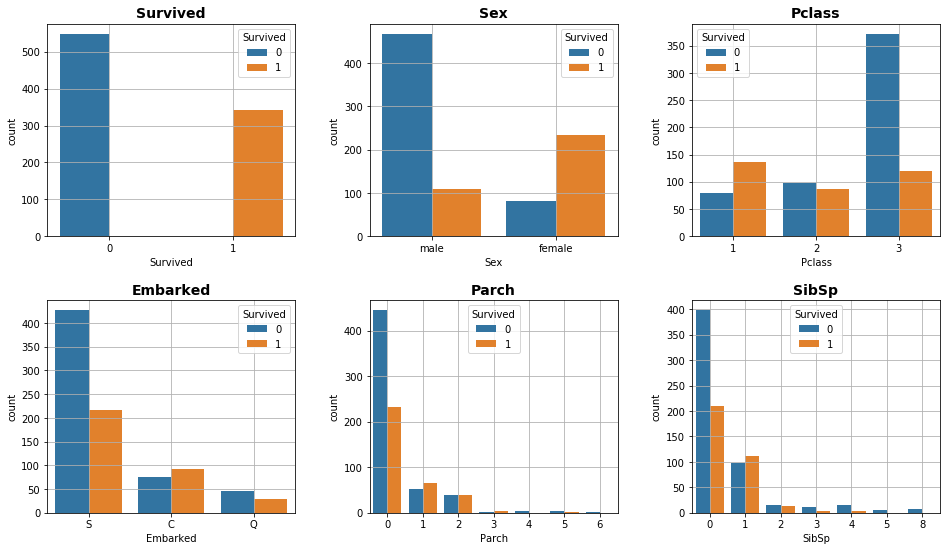

In [7]:
cat_cols = ['Survived', 'Sex', 'Pclass', 'Embarked', 'Parch', 'SibSp']
fig, axs = plt.subplots(2, 3, figsize=(16, 9))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)



for i in range(2):
    for j in range(3):
        c = i * 3 + j
        ax = axs[i][j]
    
        sns.countplot(train_set[cat_cols[c]], hue=train_set['Survived'], ax = ax)
        ax.set_title(cat_cols[c], fontsize=14, fontweight='bold')
        ax.grid()


Distribution of Age based on Pclass, Sex and Survival

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


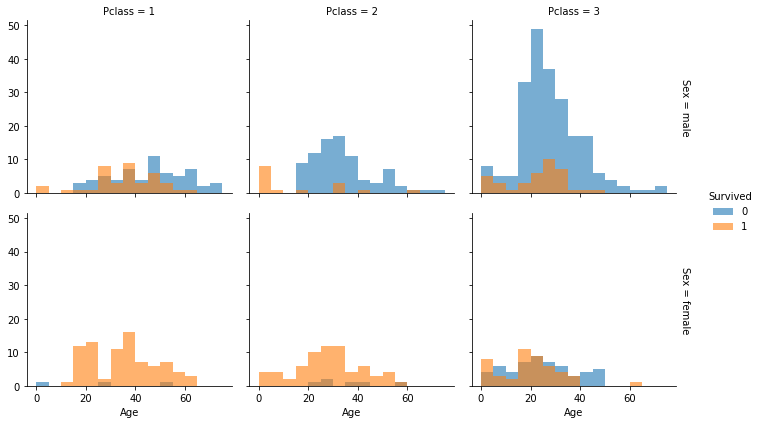

In [8]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(train_set, row='Sex', col='Pclass', hue='Survived', margin_titles=True, size=3, aspect=1.1)
g.map(sns.distplot, 'Age', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()
plt.show()  


Distribution of Age based on Embarked, Sex and Survival

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


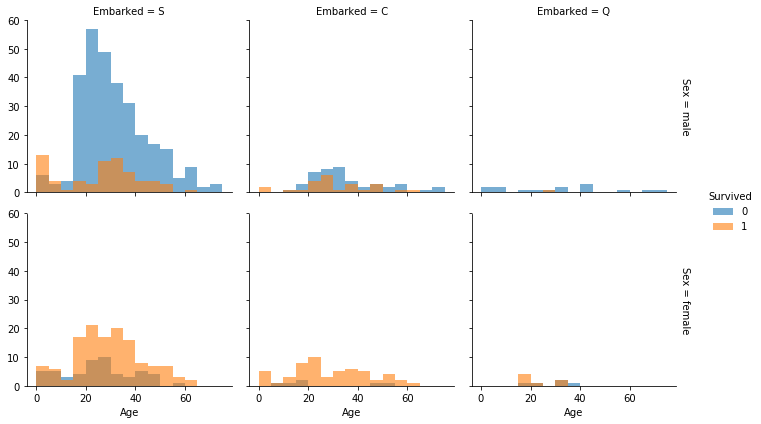

In [9]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(train_set, row='Sex', col='Embarked', hue='Survived', margin_titles=True, size=3, aspect=1.1)
g.map(sns.distplot, 'Age', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()
plt.show()  

Distribution of Fare based on Pclass, Sex and Survival

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


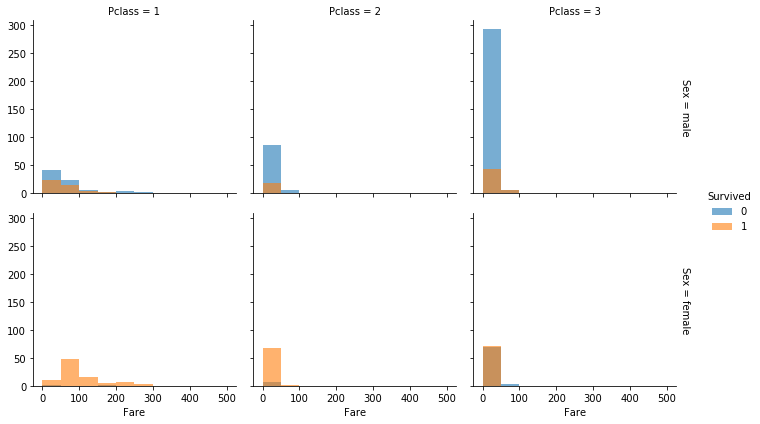

In [10]:
bins = np.arange(0, 550, 50)
g = sns.FacetGrid(train_set, row='Sex', col='Pclass', hue='Survived', margin_titles=True, size=3, aspect=1.1)
g.map(sns.distplot, 'Fare', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()
plt.show()  

Distribution of Fare based on Embarked, Sex and Survival

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


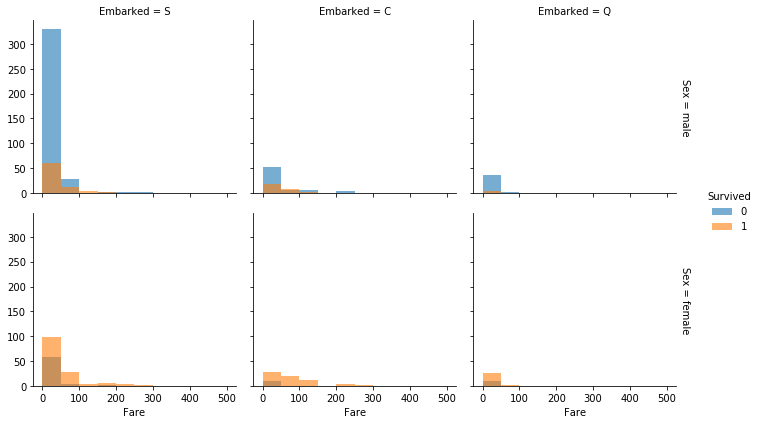

In [11]:
bins = np.arange(0, 550, 50)
g = sns.FacetGrid(train_set, row='Sex', col='Embarked', hue='Survived', margin_titles=True, size=3, aspect=1.1)
g.map(sns.distplot, 'Fare', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()
plt.show()  

## Missing Value Analysis

In [0]:
def missing_zero_values_table(df):
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[
        mz_table.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
        "There are " + str(mz_table.shape[0]) +
          " columns that have missing values.")
    return mz_table

In [13]:
missing_zero_values_table(train_set)

Your selected dataframe has 12 columns and 891 Rows.
There are 3 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Data Type
Cabin,0,687,77.1,object
Age,0,177,19.9,float64
Embarked,0,2,0.2,object


**Cabin:** More than 3/4th values are missing, so just ignore this variable as imputing might lead to wrong results <br>
**Age:** Important feature, need to do further analysis to impute the age values for those missing <br>
**Embarked:** Another importanyt feature and just 2 missing values which can be possibly filled manually with some further analysis

In [14]:
missing_zero_values_table(test_set)

Your selected dataframe has 11 columns and 418 Rows.
There are 3 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Data Type
Cabin,0,327,78.2,object
Age,0,86,20.6,float64
Fare,2,1,0.2,float64


### Analysis of Emarked

In [15]:
train_set[train_set['Embarked'].isna()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [16]:
train_set[(train_set['Pclass']==1) & (train_set['Embarked']=='Q')]['Sex'].value_counts()

male      1
female    1
Name: Sex, dtype: int64

Mode will be a good measure to impute the two missing values for Embarked in data

In [17]:
train_set['Embarked'][61] = 'S'
train_set['Embarked'][829] = 'S'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Analysis of Age

In [18]:
train_set[train_set['Age'].isna()]['Sex'].value_counts()

male      124
female     53
Name: Sex, dtype: int64

We can fill up Age based with Median with Categories of Passenger based on Sex, Pclass, Fare, Embarked. But there are a few other variables which can decide age like Family Size and the Title or Salutation. So we will impute the age later after creating those variables in Feature Engineering.

### Analysis of Fare

In [19]:
test_set[test_set['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


The missing Fare value can be filled with the Median Fare of Pclass 3 and Embarkment port S

In [0]:
test_set.at[152, 'Fare'] = np.nanmedian(test_set[(test_set['Pclass']==3) & (test_set['Embarked']=='S')]['Fare'])

In [21]:
test_set['Fare'][152]

8.05

## Feature Engineering

### Create the FamilySize Variable

In [0]:
train_set['FamilySize'] = train_set['SibSp'] + train_set['Parch'] + 1
test_set['FamilySize'] = test_set['SibSp'] + test_set['Parch'] + 1

### Create the Title variable

For that let's first analyze the structure of names closely

In [23]:
train_set['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

Clearly a trend can be seen in the names


Let's create a function to extract the title based on that trend

In [0]:
def extract_title(name):
    return name.split(',')[1].split()[0].strip()


In [0]:
train_set['Title'] = train_set['Name'].apply(extract_title)


In [26]:
train_set['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Capt.          1
Ms.            1
Mme.           1
Don.           1
Jonkheer.      1
Lady.          1
Sir.           1
the            1
Name: Title, dtype: int64

A lot of redundant Titles can still be removed and the values for this variable can be decreased

Let's create a function to do that

In [0]:
def refine_title(title):
    if title in ['Mr.', 'Sir.', 'Major.', 'Dr.', 'Capt.']:
        return 'mr'
    elif title == 'Master.':
        return 'master'
    elif title in ['Miss.', 'Ms.']:
        return 'miss'
    elif title in ['Mrs.', 'Lady.']:
        return 'mrs'
    else:
        return 'other'

In [0]:
train_set['Title'] = train_set['Title'].apply(refine_title)


In [29]:
train_set['Title'].value_counts()

mr        528
miss      183
mrs       126
master     40
other      14
Name: Title, dtype: int64

Let's apply same functions to the test set

In [0]:
test_set['Title'] = test_set['Name'].apply(extract_title)
test_set['Title'] = test_set['Title'].apply(refine_title)


In [31]:
test_set['Title'].value_counts()


mr        241
miss       79
mrs        72
master     21
other       5
Name: Title, dtype: int64

In [32]:
train_set.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,mr


### Creating the bins for Fare variable

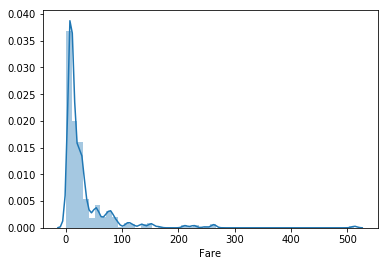

In [33]:
sns.distplot(train_set['Fare'])

From the distribution of fare it seems like the bins should be - 
1. 10 units from 0 to 100
2. 100-200
3. 200-300
4. 300+

Let's check the test set also before making final decision

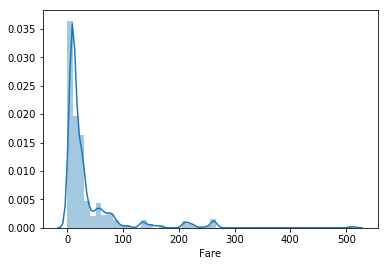

In [34]:
sns.distplot(test_set['Fare'])


The distribution looks very much similar, so let's create the function for binning the Fare

In [0]:
fare_bins = [-np.inf, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, np.inf]
fare_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
train_set['FareBin'] = pd.cut(train_set['Fare'], bins=fare_bins, labels=fare_labels)
test_set['FareBin'] = pd.cut(test_set['Fare'], bins=fare_bins, labels=fare_labels)


In [36]:
train_set.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,FareBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,mrs,8
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,mrs,6
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,mr,1


In [37]:
test_set.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,FareBin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,mr,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,mrs,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,mr,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,mr,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,mrs,2


### Fiiling missing values for Age

We have all the variables now on which Age might depend

Let's write the script to fill up the age variable

In [0]:
def fill_age(df):
    for idx, row in df.iterrows():
        if pd.isnull(row['Age']):
            value = df[ 
                (df['Pclass']==row['Pclass']) & 
                (df['Sex']==row['Sex']) & 
                (df['Embarked']==row['Embarked']) & 
                (df['Title']==row['Title']) & 
                (df['FareBin']==row['FareBin'])
            ]['Age'].median()
            if pd.isnull(value):
                value = df[ 
                (df['Sex']==row['Sex']) & 
                (df['Title']==row['Title']) & 
                (df['FareBin']==row['FareBin'])
            ]['Age'].median()
            if pd.isnull(value):
                value = df[df['Title']==row['Title']]['Age'].median()
            df.at[idx, 'Age'] = value 


In [0]:
fill_age(train_set)
fill_age(test_set)


Let's check the missing values in train and test set now

In [40]:
missing_zero_values_table(train_set)


Your selected dataframe has 15 columns and 891 Rows.
There are 1 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Data Type
Cabin,0,687,77.1,object


In [41]:
missing_zero_values_table(test_set)

Your selected dataframe has 14 columns and 418 Rows.
There are 1 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Data Type
Cabin,0,327,78.2,object


### Creating bins for Age

DIstribution of Age

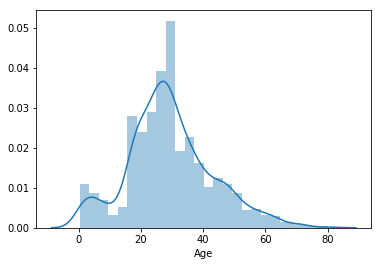

In [42]:
sns.distplot(train_set['Age'])

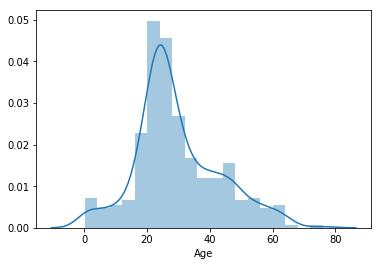

In [43]:
sns.distplot(test_set['Age'])

In [44]:
train_set['Age'].describe()

count    891.000000
mean      29.424433
std       13.718917
min        0.420000
25%       21.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [0]:
age_bins = [-np.inf, 10, 20, 30, 40, 50, 60, 70, 80, np.inf]
age_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]
train_set['AgeBin'] = pd.cut(train_set['Age'], bins=age_bins, labels=age_labels)
test_set['AgeBin'] = pd.cut(test_set['Age'], bins=age_bins, labels=age_labels)


In [46]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,FareBin,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,mr,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,mrs,8,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,miss,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,mrs,6,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,mr,1,4


### Select features to train model 

In [0]:
features = ['Pclass', 'Sex', 'Embarked', 'FamilySize', 'Title', 'FareBin', 'AgeBin', 'Fare', 'Age']

In [0]:
y_train = train_set['Survived']

In [0]:
x_train = train_set[features]
x_test = test_set[features]

In [94]:
x_train.head()

,Pclass,Sex,Embarked,FamilySize,Title,FareBin,AgeBin,Fare,Age
0,3,male,S,2,mr,1,3,7.2500,22.0
1,1,female,C,2,mrs,8,4,71.2833,38.0
2,3,female,S,1,miss,1,3,7.9250,26.0
3,1,female,S,2,mrs,6,4,53.1000,35.0
4,3,male,S,1,mr,1,4,8.0500,35.0


### Normalize the data using Standard Scaler

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(x_train[['Age', 'Fare', 'FamilySize']])
x_test[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(x_test[['Age', 'Fare', 'FamilySize']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [96]:
x_train.head()

,Pclass,Sex,Embarked,FamilySize,Title,FareBin,AgeBin,Fare,Age
0,3,male,S,0.059160,mr,1,3,-0.502445,-0.541486
1,1,female,C,0.059160,mrs,8,4,0.786845,0.625442
2,3,female,S,-0.560975,miss,1,3,-0.488854,-0.249754
3,1,female,S,0.059160,mrs,6,4,0.420730,0.406643
4,3,male,S,-0.560975,mr,1,4,-0.486337,0.406643


In [97]:
x_test.head()

,Pclass,Sex,Embarked,FamilySize,Title,FareBin,AgeBin,Fare,Age
0,3,male,Q,-0.553443,mr,1,4,-0.497079,0.369711
1,3,female,S,0.105643,mrs,1,5,-0.511942,1.305481
2,2,male,Q,-0.553443,mr,1,7,-0.463770,2.428405
3,3,male,S,-0.553443,mr,1,3,-0.482143,-0.191750
4,3,female,S,0.764728,mrs,2,3,-0.417167,-0.566058


### Convert Non-Continuous variables to Categorical Variables

In [98]:
x_train['Pclass'] = pd.Categorical(x_train['Pclass'])
x_train['Sex'] = pd.Categorical(x_train['Sex'])
x_train['Embarked'] = pd.Categorical(x_train['Embarked'])
x_train['Title'] = pd.Categorical(x_train['Title'])

x_test['Pclass'] = pd.Categorical(x_test['Pclass'])
x_test['Sex'] = pd.Categorical(x_test['Sex'])
x_test['Embarked'] = pd.Categorical(x_test['Embarked'])
x_test['Title'] = pd.Categorical(x_test['Title'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [99]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Pclass        891 non-null category
Sex           891 non-null category
Embarked      891 non-null category
FamilySize    891 non-null float64
Title         891 non-null category
FareBin       891 non-null category
AgeBin        891 non-null category
Fare          891 non-null float64
Age           891 non-null float64
dtypes: category(6), float64(3)
memory usage: 27.8 KB


In [100]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass        418 non-null category
Sex           418 non-null category
Embarked      418 non-null category
FamilySize    418 non-null float64
Title         418 non-null category
FareBin       418 non-null category
AgeBin        418 non-null category
Fare          418 non-null float64
Age           418 non-null float64
dtypes: category(6), float64(3)
memory usage: 13.9 KB


### Convert Categorical data to dummies

In [0]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [102]:
x_train.head()

,FamilySize,Fare,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_master,Title_miss,Title_mr,Title_mrs,Title_other,FareBin_1,FareBin_2,FareBin_3,FareBin_4,FareBin_5,FareBin_6,FareBin_7,FareBin_8,FareBin_9,FareBin_10,FareBin_11,FareBin_12,FareBin_13,AgeBin_1,AgeBin_2,AgeBin_3,AgeBin_4,AgeBin_5,AgeBin_6,AgeBin_7,AgeBin_8,AgeBin_9
0,0.059160,-0.502445,-0.541486,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.059160,0.786845,0.625442,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,-0.560975,-0.488854,-0.249754,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.059160,0.420730,0.406643,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-0.560975,-0.486337,0.406643,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [103]:
x_test.head()

,FamilySize,Fare,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_master,Title_miss,Title_mr,Title_mrs,Title_other,FareBin_1,FareBin_2,FareBin_3,FareBin_4,FareBin_5,FareBin_6,FareBin_7,FareBin_8,FareBin_9,FareBin_10,FareBin_11,FareBin_12,FareBin_13,AgeBin_1,AgeBin_2,AgeBin_3,AgeBin_4,AgeBin_5,AgeBin_6,AgeBin_7,AgeBin_8,AgeBin_9
0,-0.553443,-0.497079,0.369711,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.105643,-0.511942,1.305481,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,-0.553443,-0.463770,2.428405,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-0.553443,-0.482143,-0.191750,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0.764728,-0.417167,-0.566058,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## Save the data into new files

In [0]:
X = x_train.copy()
y = y_train.copy()
test_data = x_test.copy()

X.to_csv('X.csv', index=False, header=True)
test_data.to_csv('test_data.csv', index=False, header=True)
y.to_csv('y.csv', index=False, header=True)


### Save the Scaler to use in deployment

In [105]:
from sklearn.externals import joblib

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Model

## Import Libraries

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBClassifier

## Train-Validation set split

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=25)

In [108]:
X_train.head()

,FamilySize,Fare,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_master,Title_miss,Title_mr,Title_mrs,Title_other,FareBin_1,FareBin_2,FareBin_3,FareBin_4,FareBin_5,FareBin_6,FareBin_7,FareBin_8,FareBin_9,FareBin_10,FareBin_11,FareBin_12,FareBin_13,AgeBin_1,AgeBin_2,AgeBin_3,AgeBin_4,AgeBin_5,AgeBin_6,AgeBin_7,AgeBin_8,AgeBin_9
410,-0.560975,-0.489442,-0.249754,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
638,2.539699,0.150674,0.844241,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
395,-0.560975,-0.491456,-0.541486,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
221,-0.560975,-0.386671,-0.176821,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
800,-0.560975,-0.386671,0.333710,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [109]:
y_train.value_counts()

0    437
1    275
Name: Survived, dtype: int64

In [110]:
y_valid.value_counts()

0    112
1     67
Name: Survived, dtype: int64

The resultant Training and Validation sets after the split look like a true fit for the original data, so we will proceed with these sets

## Model Comparison (Validation Set)

### Gaussian NB classifier

In [111]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
gnb_prediction = gnb_clf.predict(X_valid)
print(classification_report(y_valid, gnb_prediction))


              precision    recall  f1-score   support

           0       0.70      0.90      0.79       112
           1       0.68      0.34      0.46        67

    accuracy                           0.69       179
   macro avg       0.69      0.62      0.62       179
weighted avg       0.69      0.69      0.66       179



### Support Vector Classifier

In [112]:
svc_clf = SVC(kernel='linear')
svc_clf.fit(X_train, y_train)
svc_prediction = svc_clf.predict(X_valid)
print(classification_report(y_valid, svc_prediction))


              precision    recall  f1-score   support

           0       0.85      0.83      0.84       112
           1       0.72      0.75      0.74        67

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### Decision Tree Classifier

In [113]:
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)
tree_prediction = tree_clf.predict(X_valid)
print(classification_report(y_valid, tree_prediction))


              precision    recall  f1-score   support

           0       0.83      0.84      0.84       112
           1       0.73      0.72      0.72        67

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



### Random Forest Classifier

In [114]:
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=10)
rf_clf.fit(X_train, y_train)
rf_prediction = rf_clf.predict(X_valid)
print(classification_report(y_valid, rf_prediction))


              precision    recall  f1-score   support

           0       0.85      0.88      0.86       112
           1       0.78      0.75      0.76        67

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



### Adaboost Classifier

In [115]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)
ada_prediction = ada_clf.predict(X_valid)
print(classification_report(y_valid, ada_prediction))


              precision    recall  f1-score   support

           0       0.82      0.82      0.82       112
           1       0.70      0.70      0.70        67

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



### KNN Classifier

In [116]:
knn_clf = KNeighborsClassifier(6)
knn_clf.fit(X_train, y_train)
knn_prediction = knn_clf.predict(X_valid)
print(classification_report(y_valid, knn_prediction))


              precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.78      0.67      0.72        67

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



### MLPC Classifier

In [117]:
mlpc_clf = MLPClassifier(alpha=1, max_iter=5000)
mlpc_clf.fit(X_train, y_train)
mlpc_prediction = mlpc_clf.predict(X_valid)
print(classification_report(y_valid, mlpc_prediction))


              precision    recall  f1-score   support

           0       0.84      0.87      0.85       112
           1       0.76      0.72      0.74        67

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



### Gaussian Process Classifier

In [118]:
gp_clf = GaussianProcessClassifier(1.0 * RBF(1.0))
gp_clf.fit(X_train, y_train)
gp_prediction = gp_clf.predict(X_valid)
print(classification_report(y_valid, gp_prediction))


              precision    recall  f1-score   support

           0       0.84      0.86      0.85       112
           1       0.75      0.73      0.74        67

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



### Logistic Regression

In [119]:
log_clf = LogisticRegressionCV(cv=5, max_iter=5000)
log_clf.fit(X_train, y_train)
log_prediction = log_clf.predict(X_valid)
print(classification_report(y_valid, log_prediction))
log_prediction_soft = log_clf.predict_proba(X_valid)


              precision    recall  f1-score   support

           0       0.84      0.84      0.84       112
           1       0.73      0.73      0.73        67

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### XGBoost Classifier

In [120]:
xg_clf = XGBClassifier()
xg_clf.fit(X_train, y_train)
xg_prediction = xg_clf.predict(X_valid)
print(classification_report(y_valid, xg_prediction))


              precision    recall  f1-score   support

           0       0.83      0.86      0.85       112
           1       0.75      0.72      0.73        67

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### Comparison

In [0]:
models = [gnb_clf, knn_clf, log_clf, svc_clf, tree_clf, ada_clf, xg_clf, rf_clf, mlpc_clf, gp_clf]
model_names = ['Gaussian NB', 'KNN', 'Logistic Reg', 'SVC', 'Decision Tree', 'Adaboost', 'XGBoost', 
              'Random Forest', 'MLPC', 'Gaussian Process']
accuracies = [np.round(m.score(X_valid, y_valid), 2) for m in models]
result_df = pd.DataFrame({'Model': model_names, 
                         'Accuracy': accuracies}).set_index('Model').sort_values('Accuracy', ascending=False)


In [122]:
result_df

,Accuracy
Model,
Random Forest,0.83
MLPC,0.81
Gaussian Process,0.81
KNN,0.80
Logistic Reg,0.80
SVC,0.80
XGBoost,0.80
Decision Tree,0.79
Adaboost,0.78


### Train Final Model

I will train the final model with Random Forest Classifer based on previous model performance comparison

Final model will be trained on full data

In [0]:
final_model = RandomForestClassifier(max_depth=10, n_estimators=200).fit(X, y)

In [126]:
print(final_model.score(X_valid, y_valid))

0.9273743016759777


In [127]:
print(final_model.score(X_train, y_train))

0.9325842696629213


## Create Kaggle Submission file

In [0]:
test_ids = pd.read_csv('test.csv')['PassengerId']
prediction = final_model.predict(test_data)
submission = pd.DataFrame({'PassengerId': test_ids,
                          'Survived': prediction})


In [129]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [0]:
submission.to_csv('titanic_challenge_submission_vedant511.csv', index=False, header=True)


## Save and export the model

In [131]:
from sklearn.externals import joblib

joblib.dump(final_model, 'model.pkl')


['model.pkl']